# 微积分

In [8]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

print(f(2))

4


In [9]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [10]:
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

In [11]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [12]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [13]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
            ylim=None, xscale='linear', yscale='linear',
            fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
        if legend is None:
            legend = []
    
        set_figsize(figsize)
        axes = axes if axes else d2l.plt.gca()
    
        def has_one_axis(X):
            return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                    and not hasattr(X[0], "__len__"))
    
        if has_one_axis(X):
            X = [X]
        if Y is None:
            X, Y = [[]] * len(X), X
        elif has_one_axis(Y):
            Y = [Y]
        if len(X) != len(Y):
            X = X * len(Y)
        axes.cla()
        for x, y, fmt in zip(X, Y, fmts):
            if len(x):
                axes.plot(x, y, fmt)
            else:
                axes.plot(y, fmt)
        set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

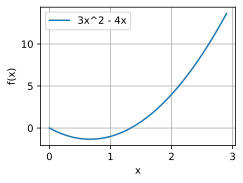

In [14]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x)], 'x', 'f(x)', legend=['3x^2 - 4x'])

梯度的计算方法：
$g = \nabla f(x) = \left[\frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, \ldots, \frac{\partial f(x)}{\partial x_n}\right]$

通俗来说，梯度可以理解为某个函数在某一点上的“斜率”或“倾斜度”。在多元函数中，梯度是一个向量，它的方向是函数在该点上升最快的方向，而它的模表示函数在该点上升的速率。